<a href="https://colab.research.google.com/github/sree-jit/ADT-Parameter/blob/main/Intro_RDKit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

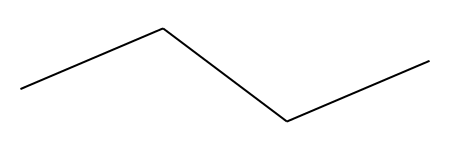

In [ ]:
mol = Chem.MolFromSmiles('CCCC')
mol

In [ ]:
smiles = Chem.MolToSmiles(mol)
smiles

'CCCC'

In [ ]:
mw = Descriptors.MolWt(mol)
mw

58.123999999999995

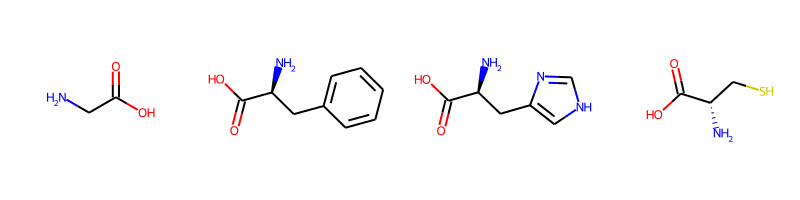

In [ ]:
smiles_list = ['C(C(=O)O)N', 'N[C@@H](CC1=CC=CC=C1)C(O)=O',
'O=C([C@H](CC1=CNC=N1)N)O','C([C@@H](C(=O)O)N)S']

mol_list = []
for smiles in smiles_list:
  mol = Chem.MolFromSmiles(smiles)
  mol_list.append(mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=4)  
img

In [ ]:
pattern = Chem.MolFromSmiles('S')

for mol in mol_list:
  print(mol.HasSubstructMatch(pattern))

False
False
False
True


In [ ]:
pattern = Chem.MolFromSmarts('[r]')

for mol in mol_list:
  print(mol.HasSubstructMatch(pattern))

False
True
True
False


In [ ]:
pattern = Chem.MolFromSmarts('[r6]')

for mol in mol_list:
  print(mol.HasSubstructMatch(pattern))

False
True
False
False


In [ ]:
pattern = Chem.MolFromSmarts('[r5]')

for mol in mol_list:
  print(mol.HasSubstructMatch(pattern))

False
False
True
False


In [ ]:
pattern = Chem.MolFromSmiles('CC(N)C')

for mol in mol_list:
  print(mol.HasSubstructMatch(pattern))

False
True
True
True


In [ ]:
pattern = Chem.MolFromSmiles('C(=O)O')

for mol in mol_list:
  print(mol.HasSubstructMatch(pattern))

True
True
True
True


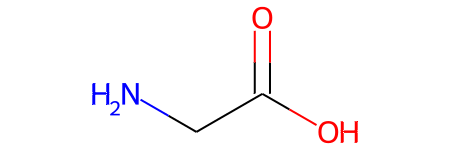

In [ ]:
# Session 02

glycine = mol_list[0]
glycine

In [ ]:
bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(glycine, 2, nBits=1024, bitInfo=bi)
fp_arr = np.zeros ((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)

(array([ 27,  80, 147, 389, 650, 713, 807, 893, 966, 981]),)

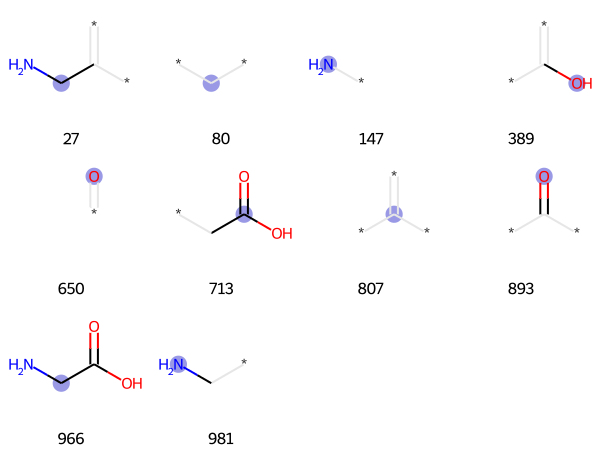

In [ ]:
prints = [(glycine, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow=4, legends=[str(x) for x in fp.GetOnBits()])

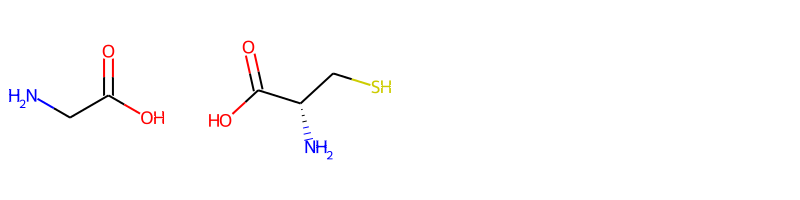

In [ ]:
cysteine = mol_list[3]
img = Draw.MolsToGridImage([glycine, cysteine], molsPerRow=4)
img



In [ ]:
fp2 = AllChem.GetMorganFingerprintAsBitVect(cysteine, 2, nBits=1024, bitInfo=bi)
print('cys', list(fp2.GetOnBits()))
print('gly', list(fp.GetOnBits()))

common = set(fp2.GetOnBits()) & set(fp.GetOnBits())
combined = set(fp2.GetOnBits()) | set(fp.GetOnBits())
print(combined)
print(common)
print(len(common)/len(combined))
print(DataStructs.TanimotoSimilarity(fp, fp2))



cys [1, 48, 80, 147, 229, 321, 389, 403, 435, 650, 786, 807, 820, 825, 893, 902]
gly [27, 80, 147, 389, 650, 713, 807, 893, 966, 981]
{1, 321, 389, 902, 966, 713, 650, 80, 786, 147, 403, 981, 27, 229, 807, 48, 435, 820, 825, 893}
{389, 807, 650, 80, 147, 893}
0.3
0.3
